In [1]:
import missingno as msno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import math

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('/kaggle/input/daily-bike-sharing/bike_sharing_daily.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,NaN,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600


---   
### *Check NaN & Empty value*

In [3]:
df.isnull().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp          17
atemp         24
hum           25
windspeed     13
casual        11
registered    11
cnt            0
dtype: int64

<Axes: >

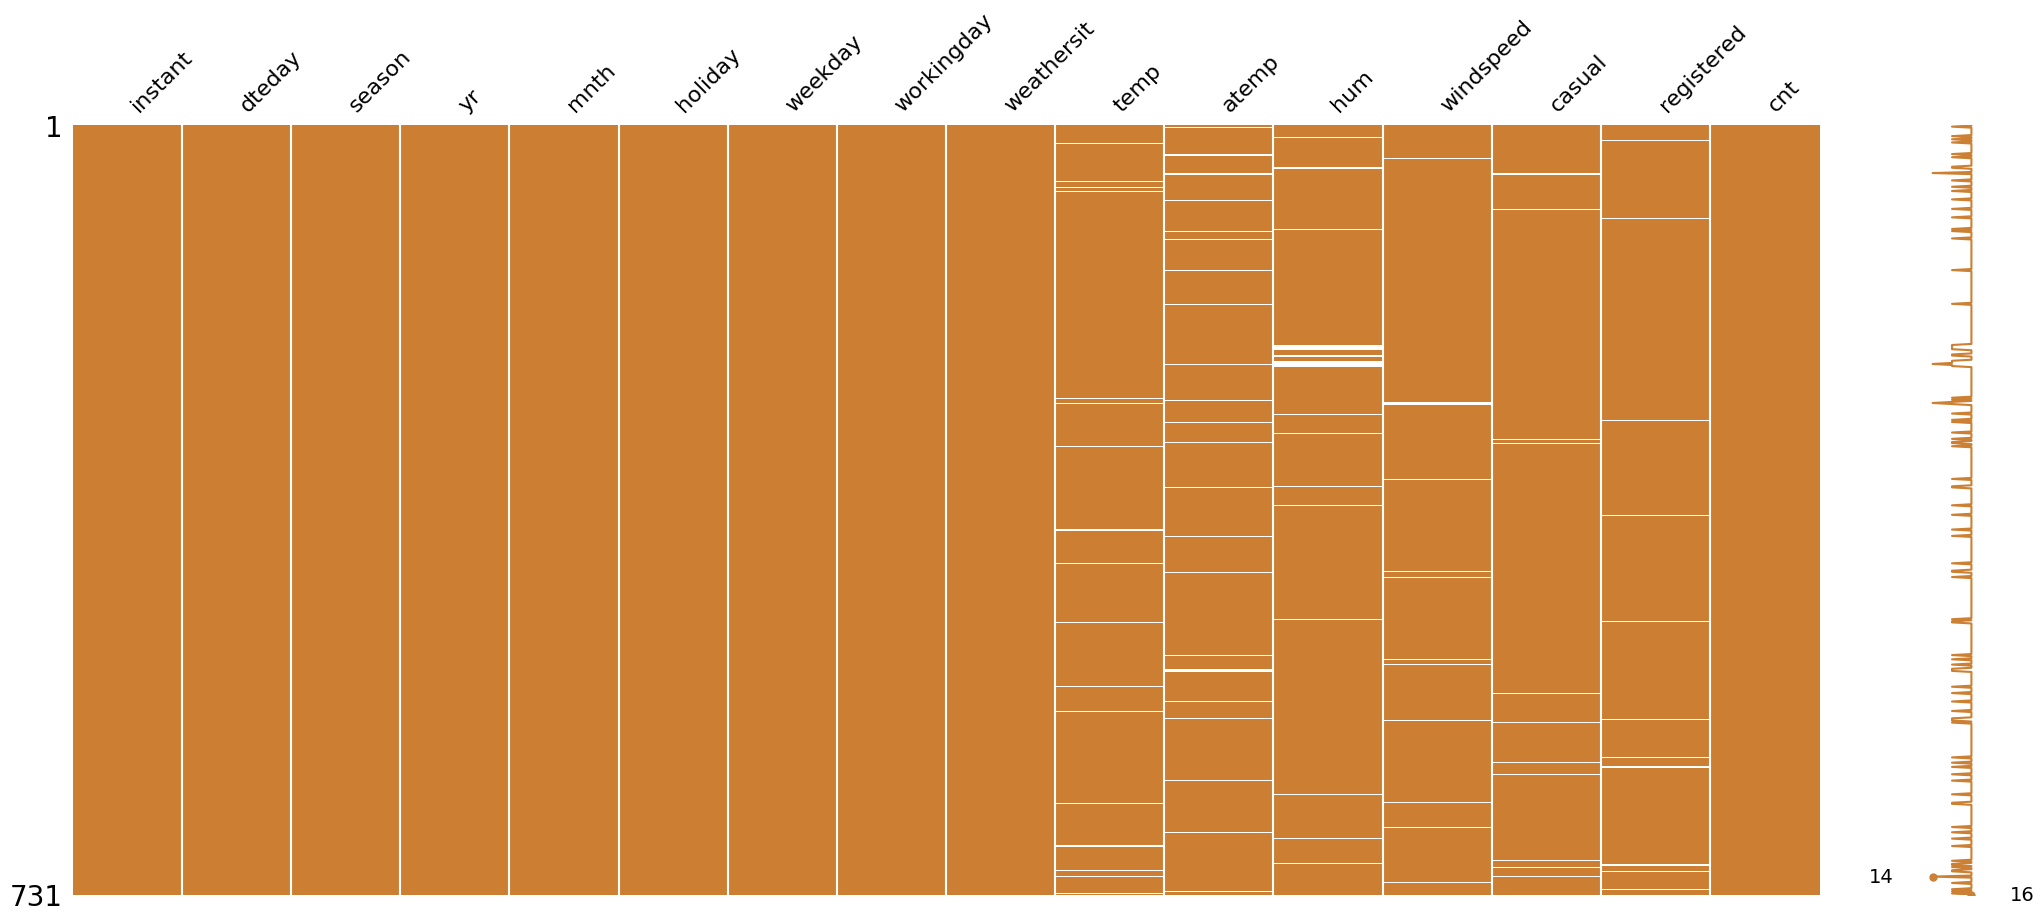

In [4]:
# Check null - visualization
msno.matrix(df, color=(0.8, 0.5, 0.2))

In [5]:
# Check empty string
def is_empty(x):
    return x.eq('').any()

df.apply(lambda x: is_empty(x))

instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

---   
### *Drop method*

In [6]:
# Drop if all val is NaN
df_all = df.dropna(how='all')
df_all.isnull().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp          17
atemp         24
hum           25
windspeed     13
casual        11
registered    11
cnt            0
dtype: int64

In [7]:
# Drop if NaN is more than criterion
crit = 3
df_crit = df.dropna(thresh=crit)
df_crit.isnull().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp          17
atemp         24
hum           25
windspeed     13
casual        11
registered    11
cnt            0
dtype: int64

In [8]:
# Drop if specific column is NaN
df_spec = df.dropna(subset=['temp'])
df_spec.isnull().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp         24
hum           25
windspeed     12
casual        10
registered    11
cnt            0
dtype: int64

In [9]:
# Drop if have Nan
df_any = df.dropna(how='any')
df_any.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

---   
### *Interpolate*

In [10]:
# with datetime
df['dteday'] = pd.to_datetime(df['dteday'])
df_i = df.set_index('dteday')
df_time = df_i.interpolate(method='time')
df_time.isnull().sum()

instant       0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
# Multiple Imputation (MICE - 다중 대치)
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df_dp = df.drop(['dteday'], axis=1)
imputer = IterativeImputer(imputation_order='ascending', max_iter=10, random_state=42, n_nearest_features=5)
df_imp = pd.DataFrame(imputer.fit_transform(df_dp), columns=df_time.columns)
df_imp.isnull().sum()

/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


instant       0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

---   
### *Binning (변수 구간화)*

In [12]:
df = pd.read_csv('/kaggle/input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [13]:
# pd.cut()
df1 = df.copy()
df1.insert(3, 'BMI_bin2', 0)

df1['BMI_bin2'] = pd.cut(df1.BMI, bins=[0, 20, 30, 40, 50, 60, 70, 95],
                        labels=['a', 'b', 'c', 'd', 'e', 'f', 'g'])
df1.head()

,HeartDisease,BMI,Smoking,BMI_bin2,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,a,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,b,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,b,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,b,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,b,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [14]:
df1.BMI_bin2.value_counts().to_frame().style.background_gradient(cmap='winter')

,count
BMI_bin2,
b,202548
c,86198
a,14699
d,13839
e,2019
f,363
g,129


In [15]:
# pd.qcut(): Automatically binning
df1.insert(4, 'BMI_bin3', 0)

df1['BMI_bin3'] = pd.qcut(df1.BMI, q=7,
                        labels=['a', 'b', 'c', 'd', 'e', 'f', 'g'])
df1.head()

,HeartDisease,BMI,Smoking,BMI_bin2,BMI_bin3,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,a,a,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,b,a,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,b,d,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,b,b,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,b,b,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [16]:
df1.BMI_bin3.value_counts().to_frame().style.background_gradient(cmap='winter')

,count
BMI_bin3,
b,47309
a,45980
d,45944
f,45805
g,45255
e,44977
c,44525


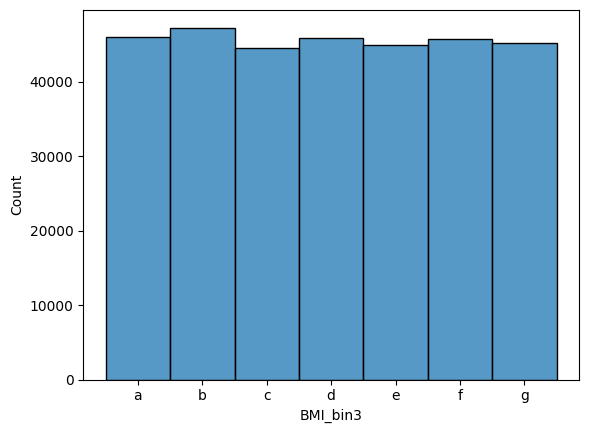

In [17]:
sns.histplot(df1['BMI_bin3'])
plt.show()

---   
### *Standardization & Normalization*

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [19]:
df = pd.read_csv('/kaggle/input/wine-dataset-for-clustering/wine-clustering.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [20]:
# Standardization
df_st = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)
df_st.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [21]:
df_st.var()

Alcohol                 1.00565
Malic_Acid              1.00565
Ash                     1.00565
Ash_Alcanity            1.00565
Magnesium               1.00565
Total_Phenols           1.00565
Flavanoids              1.00565
Nonflavanoid_Phenols    1.00565
Proanthocyanins         1.00565
Color_Intensity         1.00565
Hue                     1.00565
OD280                   1.00565
Proline                 1.00565
dtype: float64

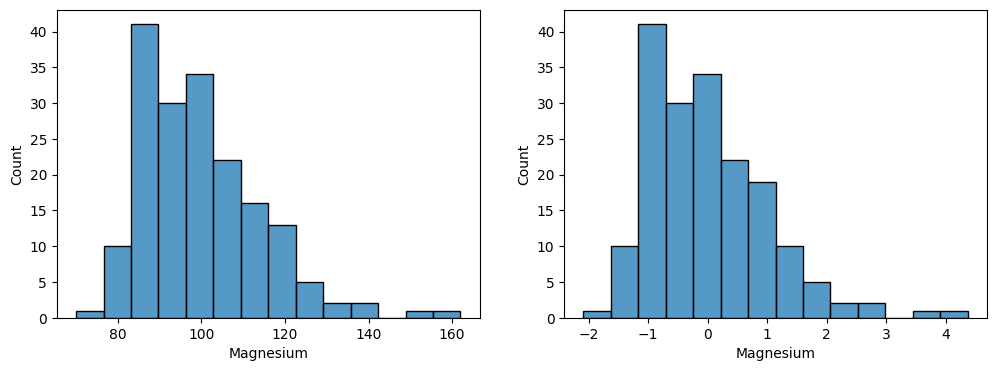

In [22]:
f, ax= plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['Magnesium'], ax=ax[0])
sns.histplot(df_st['Magnesium'], ax=ax[1])
plt.show()

In [23]:
# Normalization
df_no = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)
df_no.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


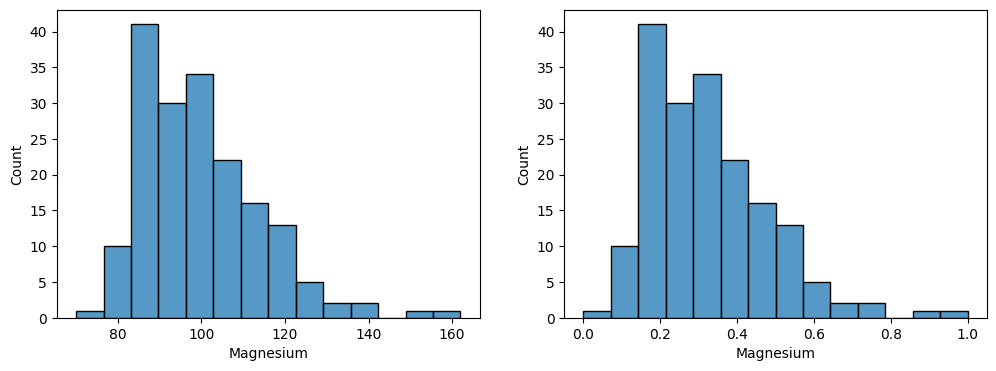

In [24]:
f, ax= plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['Magnesium'], ax=ax[0])
sns.histplot(df_no['Magnesium'], ax=ax[1])
plt.show()

In [25]:
df_ro = pd.DataFrame(RobustScaler().fit_transform(df), columns=df.columns)
df_ro.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.897338,-0.104730,0.201439,-0.906977,1.526316,0.420804,0.553892,-0.358209,1.050000,0.318792,0.222222,0.924949,0.808050
1,0.114068,-0.057432,-0.633094,-1.930233,0.105263,0.278960,0.374251,-0.477612,-0.392857,-0.104027,0.251852,0.503043,0.777090
2,0.083650,0.334459,0.892086,-0.209302,0.157895,0.420804,0.661677,-0.238806,1.792857,0.332215,0.192593,0.316430,1.055728
3,1.003802,0.057432,0.402878,-0.627907,0.789474,1.413712,0.811377,-0.597015,0.892857,1.043624,-0.311111,0.543611,1.664603
4,0.144487,0.489865,1.467626,0.348837,1.052632,0.420804,0.332335,0.298507,0.378571,-0.124161,0.222222,0.121704,0.126935


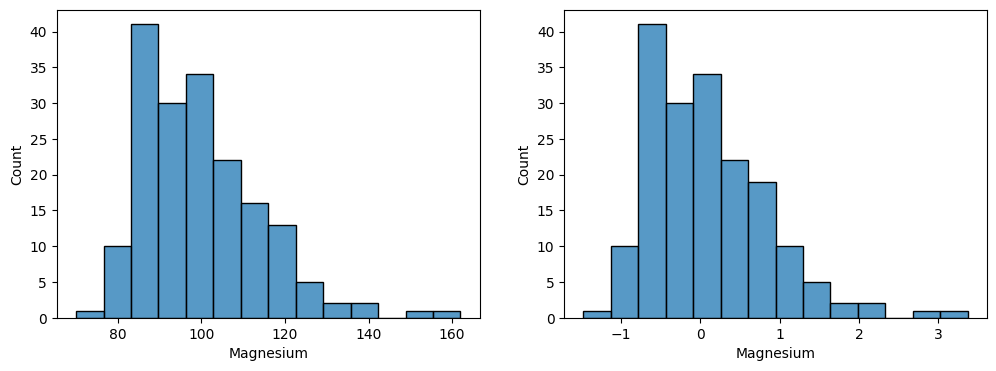

In [26]:
f, ax= plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['Magnesium'], ax=ax[0])
sns.histplot(df_ro['Magnesium'], ax=ax[1])
plt.show()

---   
### *Derived Variable with using datetime*

In [27]:
import datetime
from datetime import timedelta
from sklearn import preprocessing

In [28]:
df = pd.read_csv('/kaggle/input/retail-store-sales-transactions/scanner_data.csv')
df.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88


In [29]:
df['Date2'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Year'] = df['Date2'].dt.year
df['Month'] = df['Date2'].dt.month

df_sm = df.groupby(['Year', 'Month', 'Customer_ID'])['Sales_Amount'].agg(['sum', 'mean']).reset_index()
df2 = pd.merge(df, df_sm, how='left')
df2.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Date2,Year,Month,sum,mean
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13,2016-01-02,2016,1,27.01,6.752500
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46,2016-01-02,2016,1,14.05,3.512500
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35,2016-01-02,2016,1,135.16,7.113684
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59,2016-01-02,2016,1,244.83,9.793200
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88,2016-01-02,2016,1,6.88,6.880000


In [30]:
df2['Sales_Amount_diff'] = df2['mean'] - df2['Sales_Amount']
df2['Sales_Amount_ud'] = df2['Sales_Amount'] / df2['mean']
df2['Sales_Amount_rto'] = df2['Sales_Amount'] / df2['sum']

df2.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Date2,Year,Month,sum,mean,Sales_Amount_diff,Sales_Amount_ud,Sales_Amount_rto
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13,2016-01-02,2016,1,27.01,6.752500,3.622500,0.463532,0.115883
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46,2016-01-02,2016,1,14.05,3.512500,-1.947500,1.554448,0.388612
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35,2016-01-02,2016,1,135.16,7.113684,0.763684,0.892646,0.046981
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59,2016-01-02,2016,1,244.83,9.793200,4.203200,0.570804,0.022832
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88,2016-01-02,2016,1,6.88,6.880000,0.000000,1.000000,1.000000


In [31]:
df2['Date2_1_m'] = df2['Date2'] + timedelta(weeks=4)
df['Year_1_m'] = df2['Date2_1_m'].dt.year
df['Month_1_m'] = df2['Date2_1_m'].dt.month

df_Mn_1 = df.groupby(['Year_1_m', 'Month_1_m', 'Customer_ID'])['Sales_Amount'].agg(['sum', 'mean']).reset_index()
df_Mn_1.rename(columns={'Year_1_m':'Year', 'Month_1_m':'Month', 'sum':'sum_1_m', 'mean':'mean_1_m'}, inplace=True)
df2 = pd.merge(df2, df_Mn_1, how='left')
df2.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Date2,Year,Month,sum,mean,Sales_Amount_diff,Sales_Amount_ud,Sales_Amount_rto,Date2_1_m,sum_1_m,mean_1_m
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13,2016-01-02,2016,1,27.01,6.752500,3.622500,0.463532,0.115883,2016-01-30,3.13,3.13
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46,2016-01-02,2016,1,14.05,3.512500,-1.947500,1.554448,0.388612,2016-01-30,5.46,5.46
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35,2016-01-02,2016,1,135.16,7.113684,0.763684,0.892646,0.046981,2016-01-30,6.35,6.35
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59,2016-01-02,2016,1,244.83,9.793200,4.203200,0.570804,0.022832,2016-01-30,5.59,5.59
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88,2016-01-02,2016,1,6.88,6.880000,0.000000,1.000000,1.000000,2016-01-30,6.88,6.88


In [32]:
df2['Mn_diff_1_mean'] = df2['mean'] - df2['mean_1_m']
df2['Mn_diff_1_sum'] = df2['sum'] - df2['sum_1_m']
df2.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Date2,Year,Month,sum,mean,Sales_Amount_diff,Sales_Amount_ud,Sales_Amount_rto,Date2_1_m,sum_1_m,mean_1_m,Mn_diff_1_mean,Mn_diff_1_sum
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13,2016-01-02,2016,1,27.01,6.752500,3.622500,0.463532,0.115883,2016-01-30,3.13,3.13,3.622500,23.88
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46,2016-01-02,2016,1,14.05,3.512500,-1.947500,1.554448,0.388612,2016-01-30,5.46,5.46,-1.947500,8.59
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35,2016-01-02,2016,1,135.16,7.113684,0.763684,0.892646,0.046981,2016-01-30,6.35,6.35,0.763684,128.81
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59,2016-01-02,2016,1,244.83,9.793200,4.203200,0.570804,0.022832,2016-01-30,5.59,5.59,4.203200,239.24
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88,2016-01-02,2016,1,6.88,6.880000,0.000000,1.000000,1.000000,2016-01-30,6.88,6.88,0.000000,0.00


### *Sliding Window*

In [33]:
from dateutil.relativedelta import relativedelta

In [34]:
df = pd.read_csv('/kaggle/input/shopping-mall/shopping_mall.csv')
df.head()

,cust_id,dt,ym,sale_amt
0,AFG4127094465,2021-12-09,202112,300000
1,AFG4127094465,2022-04-22,202204,45000
2,AFG4136725677,2022-04-07,202204,47800
3,AFG4140129314,2022-02-07,202202,39200
4,AFG4144923657,2022-05-11,202205,110000


In [35]:
# Create Columns based on specific date (using relativedelta)
df_raw = df.copy()
df_raw['Date2'] = pd.to_datetime(df['dt'])

ym_li = [f"YM_M{i}" for i in range(6)]

for i in range(len(ym_li)):
    col = ym_li[i]
    now = pd.to_datetime('2022-05-01') + relativedelta(months=-i)
    df_raw[col] = 'M' + (-np.floor((df_raw.Date2 - now) / np.timedelta64(1, 'M'))).astype(int).astype(str)
    
df_raw.head()

,cust_id,dt,ym,sale_amt,Date2,YM_M0,YM_M1,YM_M2,YM_M3,YM_M4,YM_M5
0,AFG4127094465,2021-12-09,202112,300000,2021-12-09,M5,M4,M3,M2,M1,M0
1,AFG4127094465,2022-04-22,202204,45000,2022-04-22,M1,M0,M-1,M-2,M-3,M-4
2,AFG4136725677,2022-04-07,202204,47800,2022-04-07,M1,M0,M-1,M-2,M-3,M-4
3,AFG4140129314,2022-02-07,202202,39200,2022-02-07,M3,M2,M1,M0,M-1,M-2
4,AFG4144923657,2022-05-11,202205,110000,2022-05-11,M0,M-1,M-2,M-3,M-4,M-5


In [36]:
# Transform into Sliding Window Form
m_col = [f"M{i}" for i in range(6)]
df_li = []

for n, ym_t in enumerate(ym_li):
    tmp = df_raw[(df_raw[ym_t].isin(m_col)) & (df_raw.sale_amt > 0)]
    tmp = tmp.pivot_table(index='cust_id', columns=ym_t, values='sale_amt', aggfunc='sum')
    
    missing_col = list(set(m_col) - set(tmp.columns))
    for col in missing_col:
        tmp[col] = 0
    
    tmp.columns = [f'slae_amt_{c}' for c in tmp.columns]
    tmp['MM_DIFF'] = ym_t
    tmp = tmp.fillna(0)
    
    df_li.append(tmp)
    
final_df = pd.concat(df_li).reset_index()
final_df.head()

,cust_id,slae_amt_M0,slae_amt_M1,slae_amt_M2,slae_amt_M3,slae_amt_M4,slae_amt_M5,MM_DIFF
0,AFG4127094465,0.0,45000.0,0.0,0.0,0.0,300000.0,YM_M0
1,AFG4136725677,0.0,47800.0,0.0,0.0,0.0,0.0,YM_M0
2,AFG4140129314,0.0,0.0,0.0,39200.0,0.0,0.0,YM_M0
3,AFG4144923657,110000.0,0.0,0.0,0.0,0.0,0.0,YM_M0
4,AFG4154711536,0.0,0.0,0.0,45000.0,0.0,0.0,YM_M0


In [37]:
# check
final_df[(final_df.cust_id == 'AFG4127094465')]

,cust_id,slae_amt_M0,slae_amt_M1,slae_amt_M2,slae_amt_M3,slae_amt_M4,slae_amt_M5,MM_DIFF
0,AFG4127094465,0.0,45000.0,0.0,0.0,0.0,300000.0,YM_M0
843,AFG4127094465,45000.0,0.0,0.0,0.0,300000.0,0.0,YM_M1
1449,AFG4127094465,0.0,0.0,0.0,300000.0,0.0,0.0,YM_M2
1856,AFG4127094465,0.0,0.0,300000.0,0.0,0.0,0.0,YM_M3
2171,AFG4127094465,0.0,300000.0,0.0,0.0,0.0,0.0,YM_M4
2403,AFG4127094465,300000.0,0.0,0.0,0.0,0.0,0.0,YM_M5


In [38]:
final_df.tail()

,cust_id,slae_amt_M0,slae_amt_M1,slae_amt_M2,slae_amt_M3,slae_amt_M4,slae_amt_M5,MM_DIFF
2528,AFG6777275172,149000.0,0.0,0.0,0.0,0.0,0.0,YM_M5
2529,AFG6825009314,39200.0,0.0,0.0,0.0,0.0,0.0,YM_M5
2530,AFG6838532849,99000.0,0.0,0.0,0.0,0.0,0.0,YM_M5
2531,AFG6846099516,129000.0,0.0,0.0,0.0,0.0,0.0,YM_M5
2532,AFG6860414162,139000.0,0.0,0.0,0.0,0.0,0.0,YM_M5


---   
### *Dummy Variables*

In [39]:
df = pd.read_csv('/kaggle/input/gpu-cpu-benchmark/GPU_CPU_benchmark.csv')
df.head()

,Device Name,Compute Type,OS,Median Score
0,12X Intel Xeon CPU E5-2450 0 @ 2.10GHz,CPU,Linux,78.570
1,24X Intel Xeon CPU E5-2690 v3 @ 2.60GHz,CPU,Windows,297.940
2,2X 12th Gen Intel Core i9-12900KF,CPU,Windows,424.470
3,2X AMD EPYC 7343 16-Core Processor,CPU,Linux,439.210
4,2X AMD Opteron Processor 6276,CPU,Windows,81.478


In [40]:
df1 = pd.get_dummies(df)
df1.head()

,Median Score,Device Name_12X Intel Xeon CPU E5-2450 0 @ 2.10GHz,Device Name_24X Intel Xeon CPU E5-2690 v3 @ 2.60GHz,Device Name_2X 12th Gen Intel Core i9-12900KF,Device Name_2X AMD EPYC 7343 16-Core Processor,Device Name_2X AMD Opteron Processor 6276,Device Name_2X AMD Opteron(tm) Processor 6328,Device Name_2X AMD Ryzen Threadripper PRO 3995WX 64-Cores,Device Name_2X Genuine Intel CPU 0000 @ 2.00GHz,Device Name_2X Genuine Intel CPU 0000 @ 2.10GHz,Device Name_2X Intel Xeon CPU E5520 @ 2.27GHz,Device Name_2X Intel Xeon CPU X5650 @ 2.67GHz,Device Name_2X Intel Xeon CPU X5670 @ 2.93GHz,Device Name_2X Intel Xeon CPU X5675 @ 3.07GHz,Device Name_2X Intel Xeon CPU X5680 @ 3.33GHz,Device Name_2X Intel Xeon CPU X5690 @ 3.47GHz,Device Name_2X Intel Xeon CPU E5-2609 v3 @ 1.90GHz,Device Name_2X Intel Xeon CPU E5-2630 v4 @ 2.20GHz,Device Name_2X Intel Xeon CPU E5-2637 v3 @ 3.50GHz,Device Name_2X Intel Xeon CPU E5-2640 0 @ 2.50GHz,Device Name_2X Intel Xeon CPU E5-2667 0 @ 2.90GHz,Device Name_2X Intel Xeon CPU E5-2667 v3 @ 3.20GHz,Device Name_2X Intel Xeon CPU E5-2670 0 @ 2.60GHz,Device Name_2X Intel Xeon CPU E5-2670 v2 @ 2.50GHz,Device Name_2X Intel Xeon CPU E5-2670 v3 @ 2.30GHz,Device Name_2X Intel Xeon CPU E5-2678 v3 @ 2.50GHz,Device Name_2X Intel Xeon CPU E5-2680 0 @ 2.70GHz,Device Name_2X Intel Xeon CPU E5-2680 v2 @ 2.80GHz,Device Name_2X Intel Xeon CPU E5-2680 v4 @ 2.40GHz,Device Name_2X Intel Xeon CPU E5-2687W v4 @ 3.00GHz,Device Name_2X Intel Xeon CPU E5-2690 0 @ 2.90GHz,Device Name_2X Intel Xeon CPU E5-2690 v2 @ 3.00GHz,Device Name_2X Intel Xeon CPU E5-2690 v3 @ 2.60GHz,Device Name_2X Intel Xeon CPU E5-2690 v4 @ 2.60GHz,Device Name_2X Intel Xeon CPU E5-2696 v3 @ 2.30GHz,Device Name_2X Intel Xeon CPU E5-2697 v2 @ 2.70GHz,Device Name_2X Intel Xeon CPU E5-2697 v3 @ 2.60GHz,Device Name_2X Intel Xeon CPU E5-2698 v4 @ 2.20GHz,Device Name_2X Intel Xeon CPU E5-2699 v3 @ 2.30GHz,Device Name_2X Intel Xeon Gold 5215 CPU @ 2.20GHz,Device Name_2X Intel Xeon Gold 6128 CPU @ 3.40GHz,Device Name_2X Intel Xeon Gold 6330 CPU @ 2.00GHz,Device Name_2X Intel Xeon Gold 6342 CPU @ 2.80GHz,Device Name_2X Intel Xeon Platinum 8279W CPU @ 2.50GHz,Device Name_2X Intel Xeon Platinum 8280L CPU @ 2.70GHz,Device Name_2X Intel Xeon Processor (Icelake),Device Name_2X Intel Xeon Silver 4310 CPU @ 2.10GHz,Device Name_4X AMD Opteron(tm) Processor 6386 SE,Device Name_4X Intel Xeon CPU E7- 4870 @ 2.40GHz,Device Name_AMD A10-7850K APU with Radeon R7 Graphics,"Device Name_AMD A10-7850K Radeon R7, 12 Compute Cores 4C+8G","Device Name_AMD A10-9600P RADEON R5, 10 COMPUTE CORES 4C+6G",Device Name_AMD A6-6310 APU with AMD Radeon R4 Graphics,"Device Name_AMD A8-7650K Radeon R7, 10 Compute Cores 4C+6G","Device Name_AMD A9-9420 RADEON R5, 5 COMPUTE CORES 2C+3G","Device Name_AMD A9-9425 RADEON R5, 5 COMPUTE CORES 2C+3G",Device Name_AMD Athlon 200GE with Radeon Vega Graphics,Device Name_AMD Athlon 300GE with Radeon Vega Graphics,Device Name_AMD Athlon Silver 3050U with Radeon Graphics,Device Name_AMD Athlon(tm) II Dual-Core M300,Device Name_AMD Custom APU 0405,Device Name_AMD EPYC 7282 16-Core Processor,Device Name_AMD EPYC 7302P 16-Core Processor,Device Name_AMD EPYC 7551P 32-Core Processor,Device Name_AMD EPYC 7713 64-Core Processor,Device Name_AMD EPYC 7H12 64-Core Processor,Device Name_AMD EPYC 7R13 Processor,Device Name_AMD FX(tm)-4130 Quad-Core Processor,Device Name_AMD FX(tm)-6200 Six-Core Processor,Device Name_AMD FX(tm)-6300 Six-Core Processor,Device Name_AMD FX(tm)-8120 Eight-Core Processor,Device Name_AMD FX(tm)-8150 Eight-Core Processor,Device Name_AMD FX(tm)-8300 Eight-Core Processor,Device Name_AMD FX(tm)-8320 Eight-Core Processor,Device Name_AMD FX(tm)-8350 Eight-Core Processor,Device Name_AMD FX(tm)-9590 Eight-Core Processor,Device Name_AMD FX-8370 Eight-Core Processor,"Device Name_AMD FX-8800P Radeon R7, 12 Compute Cores 4C+8G",Device Name_AMD Opteron Processor 6276,"Device Name_AMD PRO A6-8570 R5, 8 COMPUTE CORES 2C+6G",Device Name_AMD Phenom(tm) II X4 945 Processo

In [41]:
df2 = pd.get_dummies(df, columns=['Compute Type', 'OS'], dtype=int)
df2.head()

,Device Name,Median Score,Compute Type_CPU,Compute Type_CUDA,Compute Type_HIP,Compute Type_METAL,Compute Type_OPTIX,OS_Linux,OS_Windows,OS_macOS
0,12X Intel Xeon CPU E5-2450 0 @ 2.10GHz,78.570,1,0,0,0,0,1,0,0
1,24X Intel Xeon CPU E5-2690 v3 @ 2.60GHz,297.940,1,0,0,0,0,0,1,0
2,2X 12th Gen Intel Core i9-12900KF,424.470,1,0,0,0,0,0,1,0
3,2X AMD EPYC 7343 16-Core Processor,439.210,1,0,0,0,0,1,0,0
4,2X AMD Opteron Processor 6276,81.478,1,0,0,0,0,0,1,0


In [42]:
# Drop a dummy - to prevent Multicollinearity problem
df3 = pd.get_dummies(df, columns=['Compute Type', 'OS'], dtype=int, drop_first=True)
df3.head()

,Device Name,Median Score,Compute Type_CUDA,Compute Type_HIP,Compute Type_METAL,Compute Type_OPTIX,OS_Windows,OS_macOS
0,12X Intel Xeon CPU E5-2450 0 @ 2.10GHz,78.570,0,0,0,0,0,0
1,24X Intel Xeon CPU E5-2690 v3 @ 2.60GHz,297.940,0,0,0,0,1,0
2,2X 12th Gen Intel Core i9-12900KF,424.470,0,0,0,0,1,0
3,2X AMD EPYC 7343 16-Core Processor,439.210,0,0,0,0,0,0
4,2X AMD Opteron Processor 6276,81.478,0,0,0,0,1,0


In [43]:
# Make a column with NaNs
df4 = pd.get_dummies(df, columns=['Compute Type', 'OS'], dtype=int, drop_first=True, dummy_na=True)
df4.head()

,Device Name,Median Score,Compute Type_CUDA,Compute Type_HIP,Compute Type_METAL,Compute Type_OPTIX,Compute Type_nan,OS_Windows,OS_macOS,OS_nan
0,12X Intel Xeon CPU E5-2450 0 @ 2.10GHz,78.570,0,0,0,0,0,0,0,0
1,24X Intel Xeon CPU E5-2690 v3 @ 2.60GHz,297.940,0,0,0,0,0,1,0,0
2,2X 12th Gen Intel Core i9-12900KF,424.470,0,0,0,0,0,1,0,0
3,2X AMD EPYC 7343 16-Core Processor,439.210,0,0,0,0,0,0,0,0
4,2X AMD Opteron Processor 6276,81.478,0,0,0,0,0,1,0,0


---   
### *Class Disparity - Under/Over Sampling*

In [44]:
from imblearn.under_sampling import *
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [45]:
df = pd.read_csv('/kaggle/input/logistic-regression/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


<Axes: xlabel='Purchased', ylabel='count'>

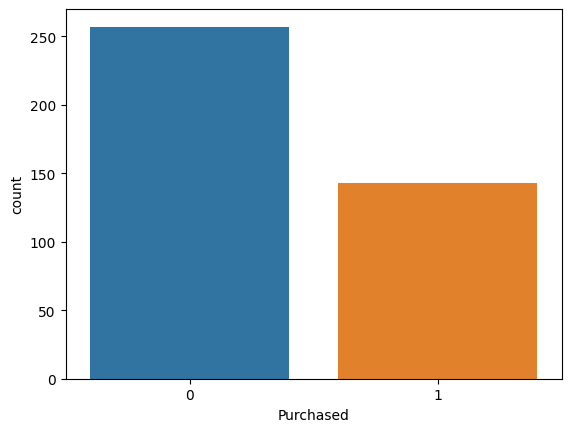

In [47]:
sns.countplot(x='Purchased', data=df)

In [48]:
df1 = pd.get_dummies(df, columns=['Gender'], dtype=int, drop_first=True)
df1.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


In [49]:
X = df1.drop(['Purchased'], axis=1)
y = df1[['Purchased']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
X_train.head()

,User ID,Age,EstimatedSalary,Gender_Male
57,15807481,28,79000,1
87,15631912,28,85000,0
357,15671387,41,72000,0
355,15606472,60,34000,1
238,15617877,46,82000,0


In [50]:
# UnderSampling
X_train_under, y_train_under = RandomUnderSampler(random_state=0).fit_resample(X_train, y_train)

print(X_train.shape, y_train.shape)
print(X_train_under.shape, y_train_under.shape)
print(y_train['Purchased'].value_counts())
print(y_train_under['Purchased'].value_counts())

(300, 4) (300, 1)
(224, 4) (224, 1)
Purchased
0    188
1    112
Name: count, dtype: int64
Purchased
0    112
1    112
Name: count, dtype: int64


In [51]:
#OverSampling
smote = SMOTE(k_neighbors=2, random_state=0)
oversample = SMOTE()

X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print(X_train.shape, y_train.shape)
print(X_train_over.shape, y_train_over.shape)
print(y_train['Purchased'].value_counts())
print(y_train_over['Purchased'].value_counts())

(300, 4) (300, 1)
(376, 4) (376, 1)
Purchased
0    188
1    112
Name: count, dtype: int64
Purchased
0    188
1    188
Name: count, dtype: int64


---   
### *Distance*

In [52]:
from scipy.spatial import distance

In [53]:
df = pd.read_csv('/kaggle/input/starbucks-seoul/Starbucks_Seoul.csv')
df.head()

,name,address,gu_name,latitude,longitude
0,GS타워,서울특별시 강남구 논현로 508 (역삼동),강남구,37.501859,127.037278
1,SSG마켓도곡R,"서울특별시 강남구 언주로30길 57, 타워팰리스Ⅱ F 지하1층 (도곡동)",강남구,37.490298,127.054895
2,W-Mall,서울특별시 금천구 디지털로 188 (가산동),금천구,37.477305,126.887691
3,가든파이브,서울특별시 송파구 충민로 10 (문정동) 가든파이브툴,송파구,37.478232,127.119370
4,가락본동,서울특별시 송파구 송파대로30길 13 (가락동),송파구,37.494895,127.118785


In [54]:
df1 = df[df['gu_name'] == '금천구']
df1

,name,address,gu_name,latitude,longitude
2,W-Mall,서울특별시 금천구 디지털로 188 (가산동),금천구,37.477305,126.887691
7,가산그레이트,"서울특별시 금천구 디지털로9길 32, 갑을그레이트밸리 1층 (가산동)",금천구,37.479449,126.887477
8,가산디지털,서울특별시 금천구 가산디지털1로 168 (가산동),금천구,37.479835,126.882500
9,가산디지털단지역,서울특별시 금천구 벚꽃로 298 (가산동),금천구,37.481324,126.883779
10,가산브이타워,서울특별시 금천구 가산디지털1로 128 (가산동),금천구,37.477221,126.883683
11,가산에스케이,서울특별시 금천구 가산디지털1로 171 (가산동),금천구,37.480613,126.880570
79,금천독산,서울특별시 금천구 두산로 70 (독산동),금천구,37.469140,126.895246
80,금천시흥,서울특별시 금천구 시흥대로 164 (시흥동),금천구,37.448624,126.903183
123,독산사거리,서울특별시 금천구 시흥대로 426 (독산동),금천구,37.471511,126.898775
146,마리오아울렛,서울특별시 금천구 벚꽃로 266 마리오아울렛3관,금천구,37.478701,126.885076


In [55]:
# Euclidean Distance
dist_euc = pd.DataFrame(distance.cdist(df1[['latitude', 'longitude']], df1[['latitude', 'longitude']], metric='euclidean'), columns=df1['name'])
dist_euc.set_index(df1['name'], inplace=True)
dist_euc

name,W-Mall,가산그레이트,가산디지털,가산디지털단지역,가산브이타워,가산에스케이,금천독산,금천시흥,독산사거리,마리오아울렛
name,,,,,,,,,,
W-Mall,0.000000,0.002155,0.005775,0.005608,0.004009,0.007852,0.011124,0.032598,0.012507,0.002964
가산그레이트,0.002155,0.000000,0.004992,0.004146,0.004400,0.007004,0.012909,0.034596,0.013808,0.002515
가산디지털,0.005775,0.004992,0.000000,0.001963,0.002869,0.002081,0.016639,0.037442,0.018280,0.002815
가산디지털단지역,0.005608,0.004146,0.001963,0.000000,0.004104,0.003287,0.016731,0.038024,0.017921,0.002926
가산브이타워,0.004009,0.004400,0.002869,0.004104,0.000000,0.004604,0.014107,0.034613,0.016136,0.002032
가산에스케이,0.007852,0.007004,0.002081,0.003287,0.004604,0.000000,0.018628,0.039175,0.020353,0.004895
금천독산,0.011124,0.012909,0.016639,0.016731,0.014107,0.018628,0.000000,0.021998,0.004252,0.013959
금천시흥,0.032598,0.034596,0.037442,0.038024,0.034613,0.039175,0.021998,0.000000,0.023308,0.035107
독산사거리,0.012507,0.013808,0.018280,0.017921,0.016136,0.020353,0.004252,0.023308,0.000000,0.015471


In [56]:
# Manhattan Distance
dist_man = pd.DataFrame(distance.cdist(df1[['latitude', 'longitude']], df1[['latitude', 'longitude']], metric='cityblock'), columns=df1['name'])
dist_man.set_index(df1['name'], inplace=True)
dist_man

name,W-Mall,가산그레이트,가산디지털,가산디지털단지역,가산브이타워,가산에스케이,금천독산,금천시흥,독산사거리,마리오아울렛
name,,,,,,,,,,
W-Mall,0.000000,0.002358,0.007721,0.007931,0.004092,0.010429,0.015720,0.044173,0.016878,0.004011
가산그레이트,0.002358,0.000000,0.005363,0.005573,0.006022,0.008071,0.018078,0.046531,0.019236,0.003149
가산디지털,0.007721,0.005363,0.000000,0.002769,0.003797,0.002708,0.023441,0.051894,0.024599,0.003710
가산디지털단지역,0.007931,0.005573,0.002769,0.000000,0.004199,0.003920,0.023651,0.052104,0.024809,0.003920
가산브이타워,0.004092,0.006022,0.003797,0.004199,0.000000,0.006505,0.019644,0.048097,0.020802,0.002873
가산에스케이,0.010429,0.008071,0.002708,0.003920,0.006505,0.000000,0.026149,0.054602,0.027307,0.006418
금천독산,0.015720,0.018078,0.023441,0.023651,0.019644,0.026149,0.000000,0.028453,0.005900,0.019731
금천시흥,0.044173,0.046531,0.051894,0.052104,0.048097,0.054602,0.028453,0.000000,0.027295,0.048184
독산사거리,0.016878,0.019236,0.024599,0.024809,0.020802,0.027307,0.005900,0.027295,0.000000,0.020889


In [57]:
# Minkowski Distance
dist_min = pd.DataFrame(distance.cdist(df1[['latitude', 'longitude']], df1[['latitude', 'longitude']], metric='minkowski', p=1.5), columns=df1['name'])
dist_min.set_index(df1['name'], inplace=True)
dist_min

name,W-Mall,가산그레이트,가산디지털,가산디지털단지역,가산브이타워,가산에스케이,금천독산,금천시흥,독산사거리,마리오아울렛
name,,,,,,,,,,
W-Mall,0.000000,0.002189,0.006310,0.006295,0.004016,0.008554,0.012482,0.035842,0.013725,0.003257
가산그레이트,0.002189,0.000000,0.005048,0.004541,0.004860,0.007222,0.014420,0.037907,0.015384,0.002672
가산디지털,0.006310,0.005048,0.000000,0.002201,0.003121,0.002247,0.018641,0.041612,0.020034,0.003056
가산디지털단지역,0.006295,0.004541,0.002201,0.000000,0.004113,0.003428,0.018776,0.042028,0.019906,0.003200
가산브이타워,0.004016,0.004860,0.003121,0.004113,0.000000,0.005165,0.015714,0.038516,0.017351,0.002281
가산에스케이,0.008554,0.007222,0.002247,0.003428,0.005165,0.000000,0.020832,0.043657,0.022276,0.005302
금천독산,0.012482,0.014420,0.018641,0.018776,0.015714,0.020832,0.000000,0.023688,0.004728,0.015664
금천시흥,0.035842,0.037907,0.041612,0.042028,0.038516,0.043657,0.023688,0.000000,0.024159,0.038834
독산사거리,0.013725,0.015384,0.020034,0.019906,0.017351,0.022276,0.004728,0.024159,0.000000,0.016982


In [58]:
# Chebyshev Distance
dist_cbs = pd.DataFrame(distance.cdist(df1[['latitude', 'longitude']], df1[['latitude', 'longitude']], metric='chebyshev'), columns=df1['name'])
dist_cbs.set_index(df1['name'], inplace=True)
dist_cbs

name,W-Mall,가산그레이트,가산디지털,가산디지털단지역,가산브이타워,가산에스케이,금천독산,금천시흥,독산사거리,마리오아울렛
name,,,,,,,,,,
W-Mall,0.000000,0.002144,0.005191,0.004019,0.004008,0.007121,0.008165,0.028681,0.011084,0.002615
가산그레이트,0.002144,0.000000,0.004977,0.003698,0.003794,0.006907,0.010309,0.030825,0.011298,0.002401
가산디지털,0.005191,0.004977,0.000000,0.001489,0.002614,0.001930,0.012746,0.031211,0.016275,0.002576
가산디지털단지역,0.004019,0.003698,0.001489,0.000000,0.004103,0.003209,0.012184,0.032700,0.014996,0.002623
가산브이타워,0.004008,0.003794,0.002614,0.004103,0.000000,0.003392,0.011563,0.028597,0.015092,0.001480
가산에스케이,0.007121,0.006907,0.001930,0.003209,0.003392,0.000000,0.014676,0.031989,0.018205,0.004506
금천독산,0.008165,0.010309,0.012746,0.012184,0.011563,0.014676,0.000000,0.020516,0.003529,0.010170
금천시흥,0.028681,0.030825,0.031211,0.032700,0.028597,0.031989,0.020516,0.000000,0.022887,0.030077
독산사거리,0.011084,0.011298,0.016275,0.014996,0.015092,0.018205,0.003529,0.022887,0.000000,0.013699


In [59]:
# Mahalanobis Distance
dist_mah = pd.DataFrame(distance.cdist(df1[['latitude', 'longitude']], df1[['latitude', 'longitude']], metric='mahalanobis'), columns=df1['name'])
dist_mah.set_index(df1['name'], inplace=True)
dist_mah

name,W-Mall,가산그레이트,가산디지털,가산디지털단지역,가산브이타워,가산에스케이,금천독산,금천시흥,독산사거리,마리오아울렛
name,,,,,,,,,,
W-Mall,0.000000,0.412222,1.008327,0.534635,1.137676,1.408515,1.021456,3.181956,2.092650,0.489261
가산그레이트,0.412222,0.000000,1.320538,0.706980,1.502236,1.716643,1.095370,3.520033,1.851829,0.817487
가산디지털,1.008327,1.320538,0.000000,0.658912,0.317804,0.400714,1.900196,3.251106,3.100708,0.519729
가산디지털단지역,0.534635,0.706980,0.658912,0.000000,0.911016,1.035496,1.554849,3.489268,2.550268,0.304243
가산브이타워,1.137676,1.502236,0.317804,0.911016,0.000000,0.420369,1.900563,2.976769,3.197236,0.687926
가산에스케이,1.408515,1.716643,0.400714,1.035496,0.420369,0.000000,2.271659,3.340112,3.500299,0.920369
금천독산,1.021456,1.095370,1.900196,1.554849,1.900563,2.271659,0.000000,2.709650,1.458239,1.434991
금천시흥,3.181956,3.520033,3.251106,3.489268,2.976769,3.340112,2.709650,0.000000,3.913709,3.194173
독산사거리,2.092650,1.851829,3.100708,2.550268,3.197236,3.500299,1.458239,3.913709,0.000000,2.581894


In [60]:
# Cosine Distance
dist_cos = pd.DataFrame(distance.cdist(df1[['latitude', 'longitude']], df1[['latitude', 'longitude']], metric='cosine'), df1['name'])
dist_cos.set_index(df1['name'], inplace=True)
dist_cos

,0,1,2,3,4,5,6,7,8,9
name,,,,,,,,,,
W-Mall,0.000000e+00,1.279999e-10,4.336818e-10,7.034265e-10,3.177569e-11,7.693567e-10,2.839378e-09,2.905348e-08,2.159871e-09,1.235210e-10
가산그레이트,1.279999e-10,0.000000e+00,9.046519e-11,2.312978e-10,3.222489e-11,2.697336e-10,4.173098e-09,3.303833e-08,3.339466e-09,3.974598e-14
가산디지털,4.336818e-10,9.046519e-11,0.000000e+00,3.245748e-11,2.306766e-10,4.777923e-11,5.492417e-09,3.658644e-08,4.529214e-09,9.430401e-11
가산디지털단지역,7.034265e-10,2.312978e-10,3.245748e-11,0.000000e+00,4.361916e-10,1.476264e-12,6.369318e-09,3.879836e-08,5.328503e-09,2.374124e-10
가산브이타워,3.177569e-11,3.222489e-11,2.306766e-10,4.361916e-10,0.000000e+00,4.884231e-10,3.471896e-09,3.100691e-08,2.715597e-09,2.999756e-11
가산에스케이,7.693567e-10,2.697336e-10,4.777923e-11,1.476264e-12,4.884231e-10,0.000000e+00,6.564742e-09,3.927851e-08,5.507374e-09,2.763336e-10
금천독산,2.839378e-09,4.173098e-09,5.492417e-09,6.369318e-09,3.471896e-09,6.564742e-09,0.000000e+00,1.372763e-08,4.639511e-11,4.147336e-09
금천시흥,2.905348e-08,3.303833e-08,3.658644e-08,3.879836e-08,3.100691e-08,3.927851e-08,1.372763e-08,0.000000e+00,1.537015e-08,3.296578e-08
독산사거리,2.159871e-09,3.339466e-09,4.529214e-09,5.328503e-09,2.715597e-09,5.507374e-09,4.639511e-11,1.537015e-08,0.000000e+00,3.316424e-09
